# Examining Racial Discrimination in the US Job Market

### Background
Racial discrimination continues to be pervasive in cultures throughout the world. Researchers examined the level of racial discrimination in the United States labor market by randomly assigning identical résumés to black-sounding or white-sounding names and observing the impact on requests for interviews from employers.

### Data
In the dataset provided, each row represents a resume. The 'race' column has two values, 'b' and 'w', indicating black-sounding and white-sounding. The column 'call' has two values, 1 and 0, indicating whether the resume received a call from employers or not.

Note that the 'b' and 'w' values in race are assigned randomly to the resumes when presented to the employer.

### Exercises
You will perform a statistical analysis to establish whether race has a significant impact on the rate of callbacks for resumes.

Answer the following questions **in this notebook below and submit to your Github account**. 

   1. What test is appropriate for this problem? Does CLT apply?
   2. What are the null and alternate hypotheses?
   3. Compute margin of error, confidence interval, and p-value.
   4. Write a story describing the statistical significance in the context or the original problem.
   5. Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet


#### Resources
+ Experiment information and data source: http://www.povertyactionlab.org/evaluation/discrimination-job-market-united-states
+ Scipy statistical methods: http://docs.scipy.org/doc/scipy/reference/stats.html 
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
import pandas as pd
import numpy as np
from scipy import stats

In [2]:
data = pd.io.stata.read_stata('data/us_job_market_discrimination.dta')

In [3]:
# number of callbacks for black-sounding names
sum(data[data.race=='b'].call)

157.0

In [4]:
data.head()

,id,ad,education,ofjobs,yearsexp,honors,volunteer,military,empholes,occupspecific,...,compreq,orgreq,manuf,transcom,bankreal,trade,busservice,othservice,missind,ownership
0,b,1,4,2,6,0,0,0,1,17,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
1,b,1,3,3,6,0,1,1,0,316,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
2,b,1,4,1,6,0,0,0,0,19,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
3,b,1,3,4,6,0,1,0,1,313,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
4,b,1,3,3,22,0,0,0,0,313,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Nonprofit


### answer start here:
   1. What test is appropriate for this problem? Does CLT apply?
      - I will use independent two sample t test
   2. What are the null and alternate hypotheses?
      - null hypothesis is there is not difference in callback rates between the resumes which has a black-sounding name and the resumes which has a white sounding name. The alternate hypotheses is that there is a difference between those two.
   3. Compute margin of error, confidence interval, and p-value.
      - ? 
      
   4. Write a story describing the statistical significance in the context or the original problem.
   5. Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?m

In [5]:
len(data)

4870

In [6]:
data_b = data.loc[data.race == 'b']
data_w = data.loc[data.race == 'w']

In [7]:
len(data_b)

2435

In [8]:
np.std(data_b.call)

0.24559901654720306

In [9]:
np.std(data_w.call)

0.29528486728668213

#### In this case, we will use independent two sample t test, to test whether the two sample have the same mean. 

#### There are two prerequisite for using two sample t test, one is the size of the two samples are the same (both are 2435), the other one is the variances of the two sample should be the same (???? not equal).


In [10]:
import scipy.stats as stats
stats.ttest_ind(data_b.call,data_w.call)

Ttest_indResult(statistic=-4.1147052908617514, pvalue=3.9408021031288859e-05)

#### From the test above, we get the t score equals -4.11, which is much less than -1.96, which mean the distribution of data set for black sounding name cases are in the extreme 5%. So reject the null hypotheses and we think there is a discrimination. 

#### However, this test do no consider other factors. So this test is no reliable. Let's look at other factors.

In [11]:
list(data)

['id',
 'ad',
 'education',
 'ofjobs',
 'yearsexp',
 'honors',
 'volunteer',
 'military',
 'empholes',
 'occupspecific',
 'occupbroad',
 'workinschool',
 'email',
 'computerskills',
 'specialskills',
 'firstname',
 'sex',
 'race',
 'h',
 'l',
 'call',
 'city',
 'kind',
 'adid',
 'fracblack',
 'fracwhite',
 'lmedhhinc',
 'fracdropout',
 'fraccolp',
 'linc',
 'col',
 'expminreq',
 'schoolreq',
 'eoe',
 'parent_sales',
 'parent_emp',
 'branch_sales',
 'branch_emp',
 'fed',
 'fracblack_empzip',
 'fracwhite_empzip',
 'lmedhhinc_empzip',
 'fracdropout_empzip',
 'fraccolp_empzip',
 'linc_empzip',
 'manager',
 'supervisor',
 'secretary',
 'offsupport',
 'salesrep',
 'retailsales',
 'req',
 'expreq',
 'comreq',
 'educreq',
 'compreq',
 'orgreq',
 'manuf',
 'transcom',
 'bankreal',
 'trade',
 'busservice',
 'othservice',
 'missind',
 'ownership']

#### I select several columns which I think may affect the callback rate:

In [12]:
data_select = data[['education','yearsexp','sex','race','occupspecific','call']]

In [17]:
# resource: https://stackoverflow.com/questions/17114904/python-pandas-replacing-strings-in-dataframe-with-numbers
mapping = {'f':1, 'm': 0,'b':1,'w':0}
corrmat=data_select.replace({'sex':mapping,'race':mapping}).corr()

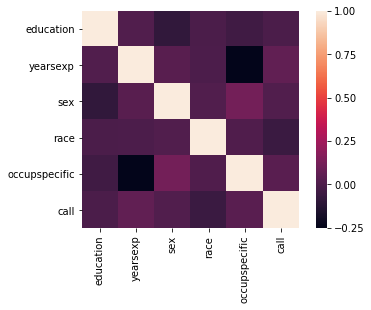

               education  yearsexp       sex      race  occupspecific  \
education       1.000000  0.011909 -0.088500 -0.003447      -0.040064   
yearsexp        0.011909  1.000000  0.033955 -0.002646      -0.252955   
sex            -0.088500  0.033955  1.000000  0.012671       0.117218   
race           -0.003447 -0.002646  0.012671  1.000000       0.007475   
occupspecific  -0.040064 -0.252955  0.117218  0.007475       1.000000   
call           -0.005748  0.061436  0.013388 -0.058872       0.040548   

                   call  
education     -0.005748  
yearsexp       0.061436  
sex            0.013388  
race          -0.058872  
occupspecific  0.040548  
call           1.000000  


In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

#corrmat = data_select.corr()

sns.heatmap(corrmat,square=True)

plt.show()
print (corrmat)

#### From the about analysis, we can see that yearsexp and occupspecific also affect the callback rate. We need to control those factors which may affect the result. 

In [24]:
data_b['yearsexp'].describe()

count    2435.000000
mean        7.829569
std         5.010764
min         1.000000
25%         5.000000
50%         6.000000
75%         9.000000
max        44.000000
Name: yearsexp, dtype: float64

In [26]:
data_w['yearsexp'].describe()

count    2435.000000
mean        7.856263
std         5.079228
min         1.000000
25%         5.000000
50%         6.000000
75%         9.000000
max        26.000000
Name: yearsexp, dtype: float64

In [29]:
data_b['occupspecific'].describe()

count    2435.000000
mean      216.744969
std       148.021857
min         7.000000
25%        27.000000
50%       267.000000
75%       313.000000
max       903.000000
Name: occupspecific, dtype: float64

In [30]:
data_w['occupspecific'].describe()

count    2435.000000
mean      214.530595
std       148.255302
min         7.000000
25%        27.000000
50%       267.000000
75%       313.000000
max       903.000000
Name: occupspecific, dtype: float64

#### In the following test, we select those samples with 6 years of experience.

In [32]:
len(data_b.loc[data_b['yearsexp']==6])

409

In [34]:
len(data_w.loc[data_w['yearsexp']==6])

408

In [38]:
data_b_6 = data_b.loc[data_b['yearsexp']==6][:408]

In [41]:
data_w_6 = data_w.loc[data_w['yearsexp']==6][:408]

In [42]:
stats.ttest_ind(data_b_6.call,data_w_6.call)

Ttest_indResult(statistic=-1.9175138390820354, pvalue=0.055522376058483446)

#### t test conclusion: 
the score is larger than -1.96, which means we accept the null hypothesis that there is no discrimination between both groups.